<a href="https://colab.research.google.com/github/RobsonCrLira/AceleraDevDS/blob/master/Semana9/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/RobsonCrLira/AceleraDevDS/master/Semana9/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/RobsonCrLira/AceleraDevDS/master/Semana9/test.csv')

In [3]:
train.shape

(13730, 167)

In [4]:
test.shape

(4570, 43)

In [32]:
corr = train.corr()
selecao = corr.IN_TREINEIRO > 0.3
aux = list(selecao[selecao == True].index) # Possui boa Coorrelação
aux

['TP_ST_CONCLUSAO', 'IN_TREINEIRO']

TP_ST_CONCLUSAO e NU_IDADE foram pré selecionada

TP_ST_CONCLUSAO - pois tem uma correlação maior que todas as outras outras colunas do dataset

NU_IDADE - pois todos os treineiros são menores de  18 anos idade



In [33]:
feature_selection = ['TP_ST_CONCLUSAO','NU_IDADE']

In [16]:
test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA',
       'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [17]:
col = list(test.columns)
col.append('IN_TREINEIRO')
train_2 = train[col]

In [18]:
train_2.shape

(13730, 44)

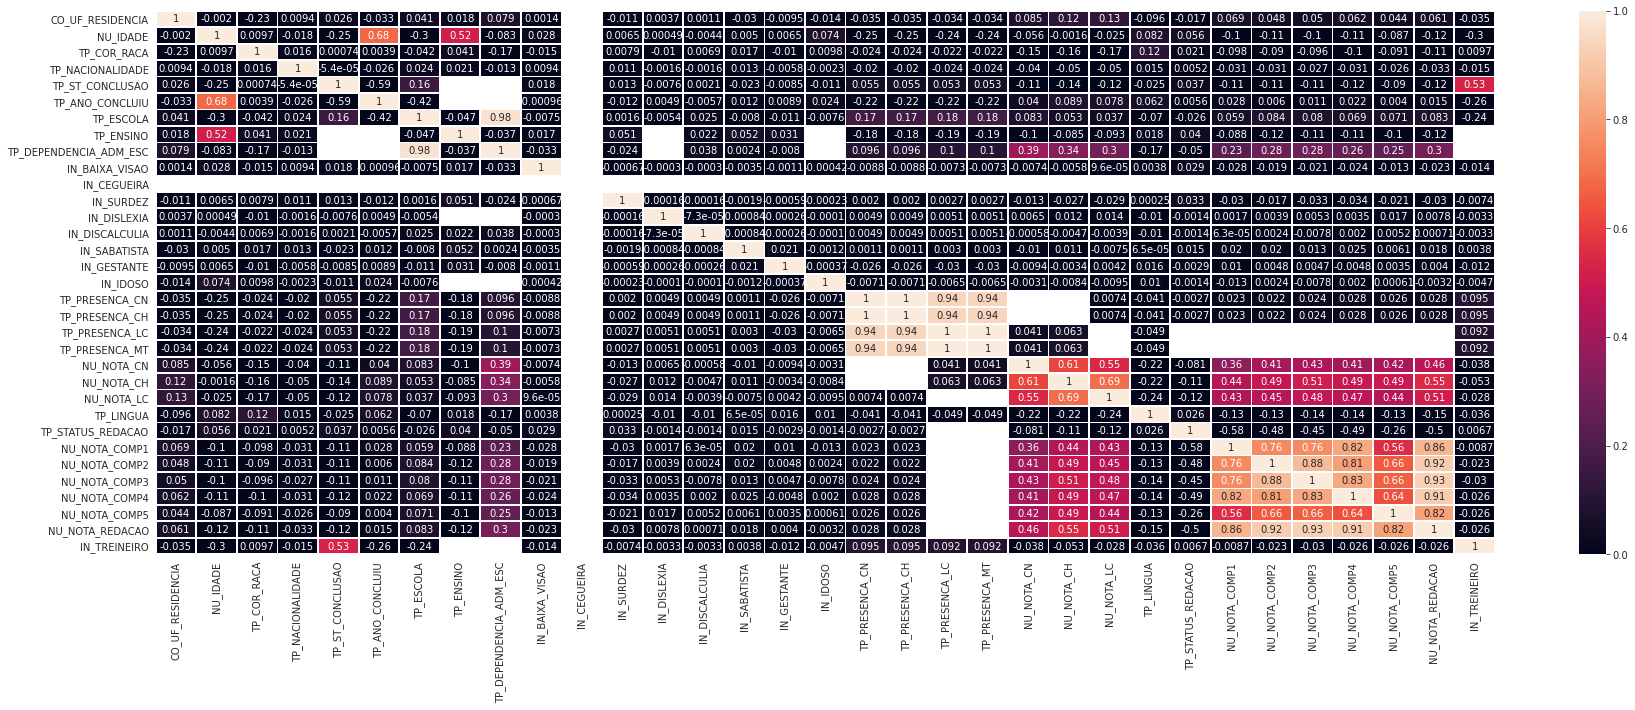

In [ ]:
corr = train_2[col].corr()
sns.set_style('whitegrid')
axes = plt.subplots(figsize=(30,10))
sns.heatmap(corr,linewidths=.8,annot=True ,vmin=0,vmax=1)

Como podemos notar neste _heatmap_ não há ninguem que tenha correlação maior que *TP_ST_CONCLUSAO* então todos os dados restantes não serão considerados para classificação


In [45]:
train_2[feature_selection].isna().sum()

TP_ST_CONCLUSAO    0
NU_IDADE           0
dtype: int64

In [49]:
X_train = train_2[feature_selection]
y_train = train_2.IN_TREINEIRO
X_test = test[feature_selection]

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
model = RandomForestClassifier(n_estimators=150)

In [48]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
previsao = model.predict(X_test)

In [51]:
previsao

array([0, 0, 1, ..., 0, 0, 0])

In [52]:
answer = pd.DataFrame({ 'NU_INSCRICAO': test.NU_INSCRICAO,
                        'IN_TREINEIRO': previsao})

In [53]:
answer.to_csv('answer.csv')